In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_process import ArmaProcess

# Generate synthetic stationary time series data for ARMA example
np.random.seed(42)
arma_process = ArmaProcess(ar=[1, -0.5], ma=[1, 0.4])  # AR(1), MA(1)
arma_sample = arma_process.generate_sample(nsample=100)

# Generate synthetic non-stationary time series data for ARIMA example
time = np.arange(100)
trend = 0.5 * time + np.random.normal(scale=5, size=100)  # Linear trend + noise

# Save both as pandas series
arma_series = pd.Series(arma_sample, name="ARMA Sample")
arima_series = pd.Series(trend, name="ARIMA Sample")

arma_series.head(), arima_series.head()


(0    0.496714
 1    0.308778
 2    0.746772
 3    2.155491
 4    1.452804
 Name: ARMA Sample, dtype: float64,
 0   -7.076854
 1   -1.603227
 2   -0.713573
 3   -2.511386
 4    1.193571
 Name: ARIMA Sample, dtype: float64)

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# --- ARMA Example (ARIMA with d=0) ---
arma_model = ARIMA(arma_series, order=(1, 0, 1))  # ARMA(1,1)
arma_result = arma_model.fit()

# Forecast next 10 values
arma_forecast = arma_result.forecast(steps=10)

In [4]:
# --- ARIMA Example (with trend, so d=1) ---
arima_model = ARIMA(arima_series, order=(1, 1, 1))  # ARIMA(1,1,1)
arima_result = arima_model.fit()

In [5]:
# Forecast next 10 values
arima_forecast = arima_result.forecast(steps=10)


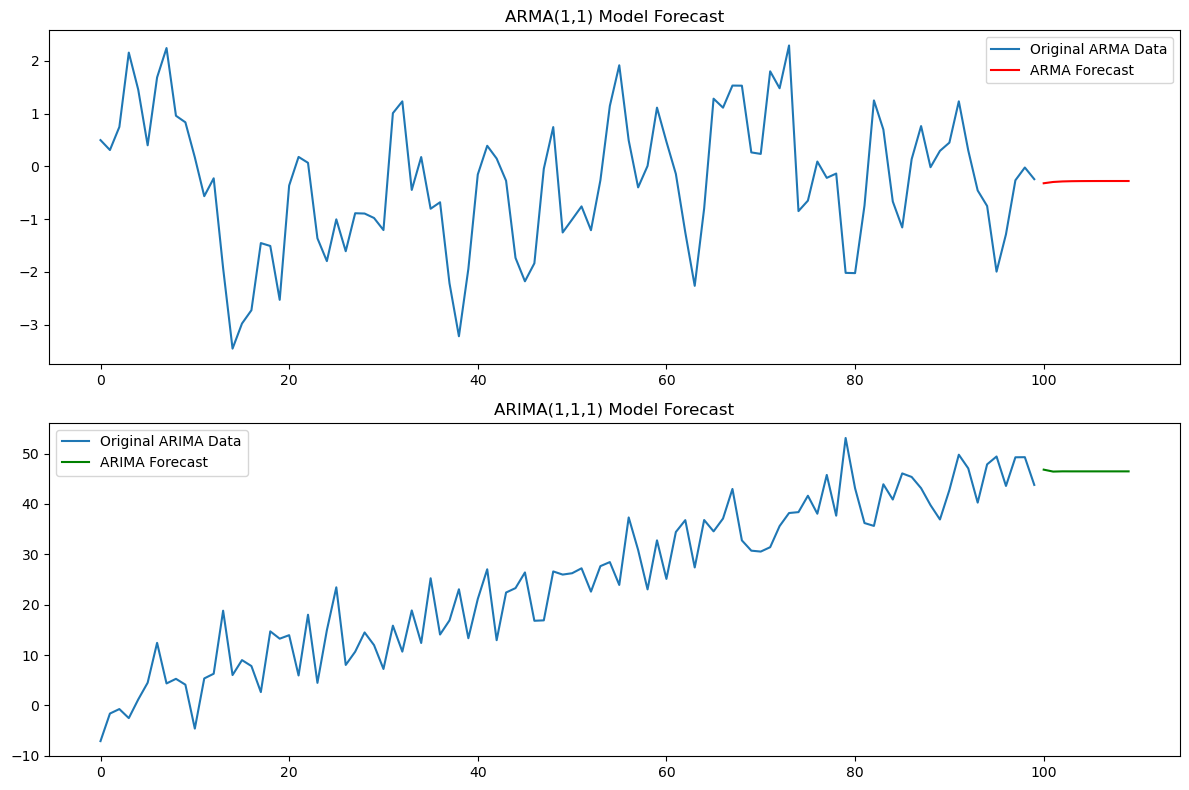

In [7]:
# Plot both
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# ARMA plot
axs[0].plot(arma_series, label="Original ARMA Data")
axs[0].plot(np.arange(len(arma_series), len(arma_series) + 10), arma_forecast, label="ARMA Forecast", color='red')
axs[0].set_title("ARMA(1,1) Model Forecast")
axs[0].legend()

# ARIMA plot
axs[1].plot(arima_series, label="Original ARIMA Data")
axs[1].plot(np.arange(len(arima_series), len(arima_series) + 10), arima_forecast, label="ARIMA Forecast", color='green')
axs[1].set_title("ARIMA(1,1,1) Model Forecast")
axs[1].legend()

plt.tight_layout()
plt.show()